## Active Learning

Download the titanic dataset here: https://drive.google.com/file/d/0Bz9_0VdXvv9bbVhpOEMwUDJ2elU/view?usp=sharing

In this exercise, we will simulate active learning. We will keep the small sample of observations for testing and we will test how quality of the model rises when we use active learning to choose labeled observations.

In [1]:
import pandas as pd

In [1]:
# Load the Data into variable df

In [41]:
data = '/Users/patrickokwir/Desktop/Lighthouse-data-notes/Unit_9/Day_3/Active_learning/train.csv'

In [42]:
df = pd.read_csv(data)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#unique values in Cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
# encode sex column, drop the original column

df['sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.drop('Sex', axis=1, inplace=True)

# encode Embarked column
df['embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.drop('Embarked', axis=1, inplace=True)

# encode cabin column using unique value

In [48]:
def clean_cabin(df):
        unique = df['Cabin'].unique()
        for i in range(len(unique)):
            df['cabin'] = df['Cabin'].map({unique[i]: i})
        return df['cabin']

In [49]:
df['cabin'] = clean_cabin(df)
df.drop('Cabin', axis=1, inplace=True)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,sex,embarked,cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1.0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0.0,NaN
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0.0,NaN


In [51]:
# import the libraries

import numpy as np

# import logistic regression
from sklearn.linear_model import LogisticRegression

# import the train test split
from sklearn.model_selection import train_test_split

# import the accuracy score
from sklearn.metrics import accuracy_score

# import the confusion matrix
from sklearn.metrics import confusion_matrix

# import the classification report
from sklearn.metrics import classification_report

# import SVC from sklearn
from sklearn.svm import SVC



In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,sex,embarked,cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1.0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0.0,NaN
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0.0,NaN


In [59]:
# check for Nan
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            139
SibSp            0
Parch            0
Ticket           0
Fare             0
sex              0
embarked         2
cabin          691
dtype: int64

In [60]:
# TEST SAMPLE
# USE THIS SAMPLE ONLY FOR TESTING
test_df = df.sample(n=100, random_state=42)
# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
df = df[~df.PassengerId.isin(test_df.PassengerId.tolist())]

In [61]:
X_test = test_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'cabin', 'Age',], axis=1)
y_test = test_df['Survived']

In [71]:
y_test.shape

(100,)

In [62]:
# FIT THE FIRST MODEL ONLY ON THE DATAFRAME START_DF
start_df = df.sample(n=100, random_state=42)
# DROP OBS FROM START_DF FROM DF
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

In [63]:
y = start_df.Survived
X = start_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'cabin', 'Age'], axis=1)

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [72]:
y.shape

(100,)

In [ ]:
# chec

### Tasks

1. fit the first model only on the **start_df** using **SVM** and evaluate accuracy, precision and recall on test_df
2. in each iteration, add 10 observations from **df** to your trainset (choose the observation using active learning approach) 
    - score all observations in df and take 10 where the model isn't sure what class it is. The probability of surviving will be around 50% 
3. refit the model and evaluate on **test_df** again.    
3. the goal is to converge to the optimal solution as fast as possible by choosing **right** observations in each iteration
4. plot the graphs for each eval metric, where on the axis x is iteration number, on y is the metric value for that model

In [29]:
# import pipeline from sklearn
from sklearn.pipeline import Pipeline

# import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# import one simple encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [78]:
# fit the model using the start_df using SVC, evaluate using the test_df, each iteration add 10 observations from df to start_df using active learning
# score all oberations in df and take 10 where model isnt sure about the prediction (probabilities are close to 0.5)
# refit the model and test on test_df

# create the model
model = SVC(kernel='rbf', gamma='auto', probability=True)
# fit the model
model.fit(X, y)
# evaluate the model
y_test = model.predict(X_test)
# get the accuracy score
accuracy_score(y, y_test)

# get precision and recall
print(classification_report(y, y_test))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        70
           1       0.28      0.17      0.21        30

    accuracy                           0.62       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.57      0.62      0.59       100



In [65]:
# get number of observations in df
df.shape[0]

491

In [85]:
# create a function that will take the model, the df, the start_df, the test_df, the number of iterations, the number of observations to add each iteration
iterations = 49
n_add = 10

score = []
iteration = []
probability = []
def active_learning(model, df, start_df, test_df, iterations, n_add):
    for i in range(iterations):
        start_df = pd.concat([start_df, df.sample(n=n_add, random_state=42)])
        X = start_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'cabin', 'Age'], axis=1)
        y = start_df.Survived

        X_test = test_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'cabin', 'Age'], axis=1)
        y_test = test_df.Survived

        model.fit(X, y)
        y_pred = model.predict(X_test)
        iteration.append(i)
        score.append(accuracy_score(y_pred, y_test))
        probability.append(model.predict_proba(X_test))
        print(f'Iteration: {i}, Score: {accuracy_score(y_pred, y_test)}')
    #return iteration, score, probability


In [86]:
active_learning(model, df, start_df, test_df, iterations, n_add)

Iteration: 0, Score: 0.74
Iteration: 1, Score: 0.75
Iteration: 2, Score: 0.75
Iteration: 3, Score: 0.75
Iteration: 4, Score: 0.72
Iteration: 5, Score: 0.69
Iteration: 6, Score: 0.69
Iteration: 7, Score: 0.72
Iteration: 8, Score: 0.7
Iteration: 9, Score: 0.7
Iteration: 10, Score: 0.7
Iteration: 11, Score: 0.7
Iteration: 12, Score: 0.7
Iteration: 13, Score: 0.7
Iteration: 14, Score: 0.7
Iteration: 15, Score: 0.7
Iteration: 16, Score: 0.7
Iteration: 17, Score: 0.7
Iteration: 18, Score: 0.7
Iteration: 19, Score: 0.7
Iteration: 20, Score: 0.7
Iteration: 21, Score: 0.7
Iteration: 22, Score: 0.7
Iteration: 23, Score: 0.7
Iteration: 24, Score: 0.7
Iteration: 25, Score: 0.7
Iteration: 26, Score: 0.7
Iteration: 27, Score: 0.7
Iteration: 28, Score: 0.7
Iteration: 29, Score: 0.7
Iteration: 30, Score: 0.7
Iteration: 31, Score: 0.7
Iteration: 32, Score: 0.7
Iteration: 33, Score: 0.7
Iteration: 34, Score: 0.7
Iteration: 35, Score: 0.7
Iteration: 36, Score: 0.7
Iteration: 37, Score: 0.7
Iteration: 38,

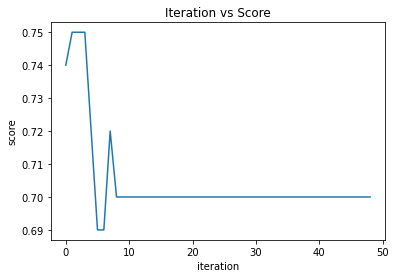

In [90]:
# plot iteration vs score
import matplotlib.pyplot as plt
import numpy as np
plt.plot(iteration, score)
plt.xlabel('iteration')
plt.ylabel('score')
plt.title('Iteration vs Score')
plt.show()
